In [1]:
%load_ext lab_black

from puzzles import load

In [97]:
import re

import numpy as np

from scipy.spatial.distance import euclidean


def rmse_in_between(pts):
    error = 0
    for i in range(len(pts)):
        for j in range(len(pts)):
            a, b = pts[i], pts[j]
            error += np.sqrt(euclidean(a[:2], b[:2]))
    error /= len(pts)
    return error


import matplotlib.pyplot as plt

from glob import glob
import cv2

---

In [81]:
from tqdm import tqdm

In [82]:
errs = []
e_min = 1e9
for i in tqdm(range(20)):
    points[:, :2] = points[:, :2] + points[:, 2:]
    e = rmse_in_between(points)
    errs.append(e)
    if e < e_min:
        e_min = e
        best_pts = points[:, :2].copy()

100%|███████████████████████████████████████████| 20/20 [00:55<00:00,  2.75s/it]


---

In [153]:
import pandas as pd

In [154]:
points = np.array(
    [re.findall(r"\-?\d+", line) for line in load(10).strip().split("\n")]
).astype(int)

points[:, :2] = points[:, :2] + points[:, 2:] * 9000

In [155]:
df = pd.DataFrame(points, columns=["x", "y", "dx", "dy"])

In [156]:
df.sort_values(by=["x", "y"], inplace=True)

In [157]:
N = 0
for _ in range(100000):
    N += 1

    df["x"] = df["x"] + df["dx"]
    df["y"] = df["y"] + df["dy"]

    if df.x.value_counts().iloc[0] > 15 or df.y.value_counts().iloc[0] > 15:
        print("yep")
        break

yep


(160.0, 100.0)

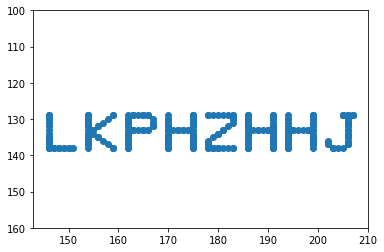

In [166]:
N += 1
df["x"] = df["x"] + df["dx"]
df["y"] = df["y"] + df["dy"]

pts = df[["x", "y"]].values.copy()

plt.scatter(pts[:, 0], pts[:, 1])
plt.ylim([160, 100])

In [167]:
N

1159